In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import random

In [4]:
np.arange(-10,11,1)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

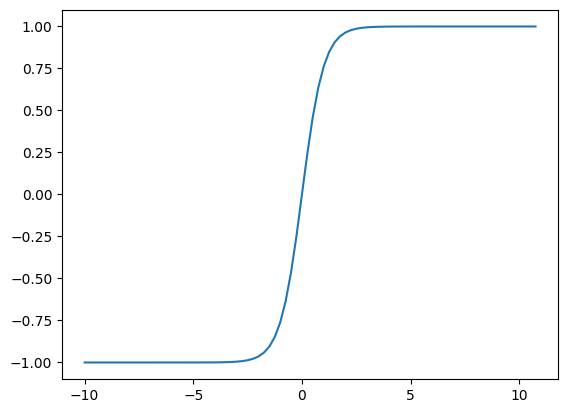

In [8]:
plt.plot(np.arange(-10,11,0.25), np.tanh(np.arange(-10,11,0.25)))

In [38]:
class Value:

    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self.grad = 0.0
        self.label = label
        self._children = _children
        self._op = _op
        self._backward = lambda: None
        self._prev = set(_children)

    def __repr__(self):
        return f"Value(data:{self.data})"

    def __str__(self):
        return f"Value(data:{self.data})"

    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data + other.data, (self,other), "+")
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __radd__(self,other):
        return self + other

    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        # other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), "*")
        def _backward():
            self.grad += other.grad * out.grad
            other.grad += self.grad * out.grad
        out._backward = _backward
        return out

    def __rmul__(self,other):
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int,float)), "Only int and float are supported"
        out = Value(self.data**other, (self,), f"**{other}")
        def _backward():
            self.grad += other * self.data ** (other - 1) * out.grad
        out._backward = _backward
        return self * self

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), "exp")
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def __truediv__(self,other):
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), "tanh")
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward():
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        for n in reversed(topo):
            node._backward()
                    
        
        

In [ ]:
import random

class Neuron:

    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        act = sum((wi*xi for wi, xi in zip(self.w,x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:

    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in nout]